In [1]:
from multiprocessing import Pool
from keras.utils import load_img, img_to_array 
import glob
import numpy as np
from tqdm import tqdm

# First Time (train-test split)

In [2]:
def noise(array, noise_factor=1, mean=0, std=1):
    """
    Adds random noise to each image in the supplied array.
    """
    noisy_array = array + noise_factor * np.random.normal(
        mean, std, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

import matplotlib.pyplot as plt

def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

def display_test(array1, array2, array3):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]
    images3 = array3[indices, :]

    

    plt.figure(figsize=(20, 4))
    for i, (image1, image2, image3) in enumerate(zip(images1, images2, images3)):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(image1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(image2)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n + n)
        plt.imshow(image3)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()

In [3]:
# face_images = glob.glob('../DATA/thumbnails128x128/*.png')

# def read(path):
#     img = load_img(path)
#     img = img_to_array(img)
#     img = img/255.
#     return img

# img_array = []
# for path in tqdm(face_images[:20000]):
#     img = read(path)
#     img_array.append(img)

In [5]:
# train_data = np.array(img_array)
# noisy_train_data = noise(train_data, 1, 0, 0.2)

# display(train_data, noisy_train_data)

In [6]:
# # save the train data and noisy train data
# import pickle

# with open('../DATA/thumbnails128x128/train_data.pkl', 'wb') as f:
#     pickle.dump(train_data, f)

# with open('../DATA/thumbnails128x128/noisy_train_data.pkl', 'wb') as f:
#     pickle.dump(noisy_train_data, f)

In [7]:
# face_images = glob.glob('../DATA/thumbnails128x128/*.png')

# def read(path):
#     img = load_img(path)
#     img = img_to_array(img)
#     img = img/255.
#     return img

# img_array = []
# for path in tqdm(face_images[20000:22000]):
#     img = read(path)
#     img_array.append(img)

# test_data = np.array(img_array)
# noisy_test_data = noise(test_data, 1, 0, 0.2)

# display(test_data, noisy_test_data)



In [8]:
# # save the test data and noisy test data
# import pickle

# with open('../DATA/thumbnails128x128/test_data.pkl', 'wb') as f:
#     pickle.dump(test_data, f)

# with open('../DATA/thumbnails128x128/noisy_test_data.pkl', 'wb') as f:
#     pickle.dump(noisy_test_data, f)

# Load train data

In [9]:
import pickle
with open('../DATA/thumbnails128x128/train_data.pkl', 'rb') as f:
    train_data = pickle.load(f)

print(train_data.shape)

with open('../DATA/thumbnails128x128/noisy_train_data.pkl', 'rb') as f:
    noisy_train_data = pickle.load(f)

print(noisy_train_data.shape)

(20000, 128, 128, 3)
(20000, 128, 128, 3)


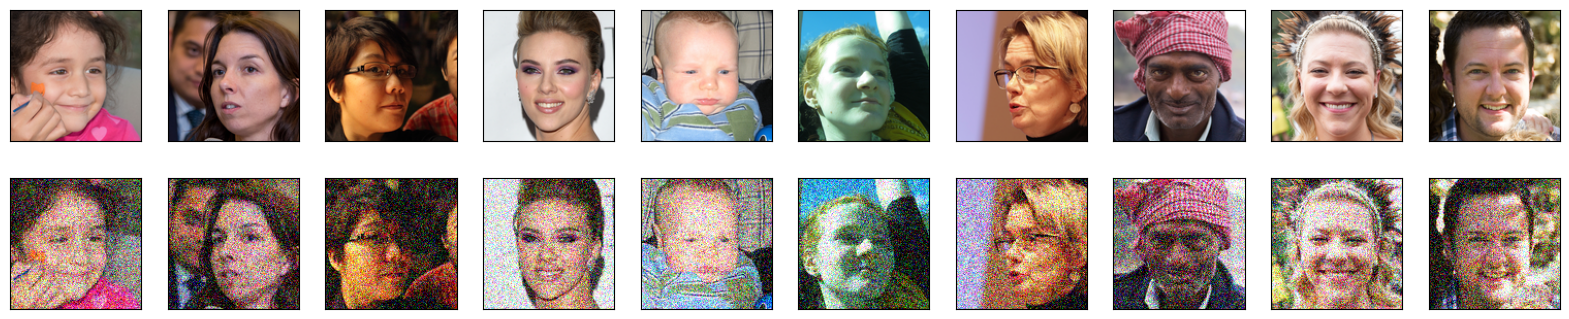

In [10]:
display(train_data, noisy_train_data)

# Model Training

In [11]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Conv2DTranspose, UpSampling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
from AE_RESNET.resnetAE import ResNetAE
from keras.callbacks import EarlyStopping
import tensorflow as tf

In [12]:
resnet18AE = ResNetAE(input_shape = (128, 128, 3), output_channels=3)
resnet18AE.summary()

Model: "ResNetAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 ResNet_encoder (Functional)  (None, 4, 4, 512)        12604352  
                                                                 
 ResNet_decoder (Functional)  (None, 128, 128, 3)      17248911  
                                                                 
Total params: 29,853,263
Trainable params: 29,833,929
Non-trainable params: 19,334
_________________________________________________________________


In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
resnet18AE.compile(optimizer=optimizer, loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = resnet18AE.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=30,
    batch_size=64,
    shuffle=True,
    validation_data=None,
    validation_split=0.1,
    callbacks=[early_stopping],
)

Epoch 1/30
282/282 [==============================] - 72s 227ms/step - loss: 0.0277 - val_loss: 0.0285
Epoch 2/30
282/282 [==============================] - 63s 222ms/step - loss: 0.0155 - val_loss: 0.0130
Epoch 3/30
282/282 [==============================] - 63s 223ms/step - loss: 0.0133 - val_loss: 0.0155
Epoch 4/30
282/282 [==============================] - 63s 222ms/step - loss: 0.0119 - val_loss: 0.0133
Epoch 5/30
282/282 [==============================] - 63s 222ms/step - loss: 0.0106 - val_loss: 0.0099
Epoch 6/30
282/282 [==============================] - 63s 223ms/step - loss: 0.0095 - val_loss: 0.0085
Epoch 7/30
282/282 [==============================] - 63s 222ms/step - loss: 0.0087 - val_loss: 0.0130
Epoch 8/30
282/282 [==============================] - 63s 222ms/step - loss: 0.0080 - val_loss: 0.0081
Epoch 9/30
282/282 [==============================] - 63s 223ms/step - loss: 0.0074 - val_loss: 0.0078
Epoch 10/30
282/282 [==============================] - 63s 223ms/step - l

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lr(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

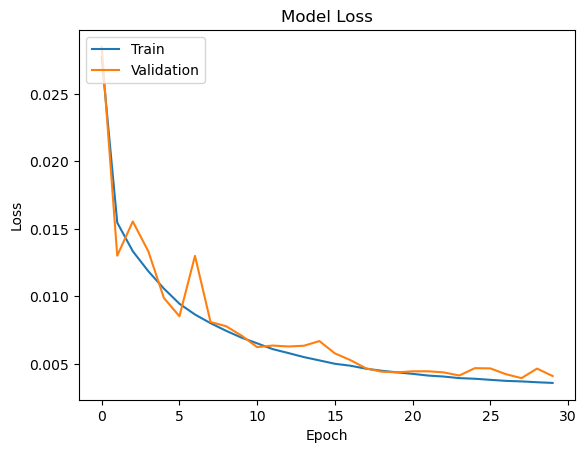

In [17]:
plot_lr(history)

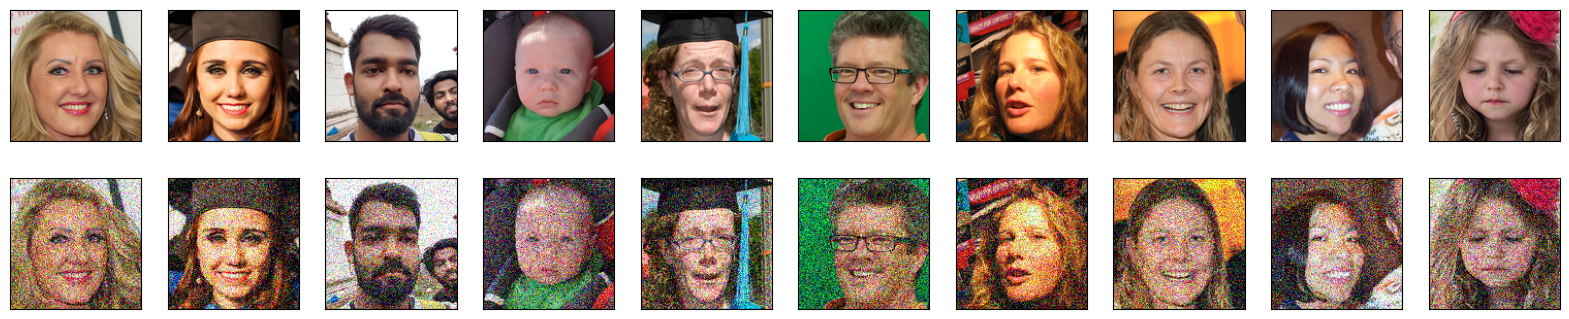

In [18]:
# load the test data

with open('../DATA/thumbnails128x128/test_data.pkl', 'rb') as f:
    test_data = pickle.load(f)

with open('../DATA/thumbnails128x128/noisy_test_data.pkl', 'rb') as f:
    noisy_test_data = pickle.load(f)

display(test_data, noisy_test_data)

63/63 [==============================] - 3s 32ms/step


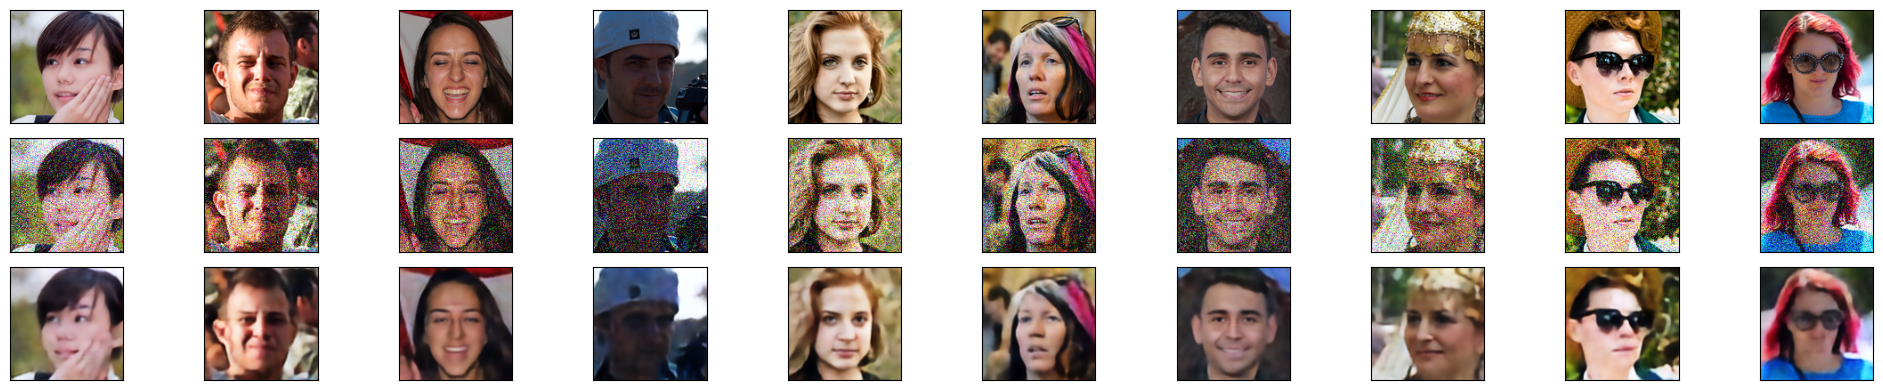

In [19]:
predicted_test_data = resnet18AE.predict(noisy_test_data)

display_test(test_data, noisy_test_data, predicted_test_data)

In [21]:
# ssim score
test_data = tf.cast(test_data, tf.float32)
predicted_test_data = tf.cast(predicted_test_data, tf.float32)
noisy_test_data = tf.cast(noisy_test_data, tf.float32)

ssim = tf.image.ssim(test_data, predicted_test_data, max_val=1.0)
ssim = tf.reduce_mean(ssim)
print('SSIM Score:',ssim)

ssim2 = tf.image.ssim(test_data, noisy_test_data, max_val=1.0)
ssim2 = tf.reduce_mean(ssim2)
print('SSIM Score:',ssim2)

# psnr score
psnr = tf.image.psnr(test_data, predicted_test_data, max_val=1.0)
psnr = tf.reduce_mean(psnr)
print('PSNR Score:',psnr)

psnr2 = tf.image.psnr(test_data, noisy_test_data, max_val=1.0)
psnr2 = tf.reduce_mean(psnr2)
print('PSNR Score:',psnr2)

SSIM Score: tf.Tensor(0.72507745, shape=(), dtype=float32)
SSIM Score: tf.Tensor(0.2104425, shape=(), dtype=float32)
PSNR Score: tf.Tensor(24.276758, shape=(), dtype=float32)
PSNR Score: tf.Tensor(14.942866, shape=(), dtype=float32)


In [22]:
resnet18AE.save('final_models/resnet18AE_color_lr0001.h5')